### To predict whether the person will have diabetes or not

In [3]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#load the data
data = pd.read_csv('diabetes1.csv')

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Basic checks


In [6]:
# no of rows and columns
data.shape

(768, 9)

In [7]:
# print 5 rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# print last 5 rows
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
# print all columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# check datatype of each column
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
# check memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# unique values in Outcome
data.Outcome.unique()

array([1, 0])

In [13]:
# find count of diabetic and non diabetic
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
# statistical analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [15]:
data.loc[data['Pregnancies']==17]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [16]:
# check for missing values
data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Domain Analysis

### Exploratory data analysis


**Step 1 Univariate Analysis**
- histplot is used to check distribution of the data
- count plot is used to check whether data is balanced or not.

<Axes: xlabel='Outcome', ylabel='count'>

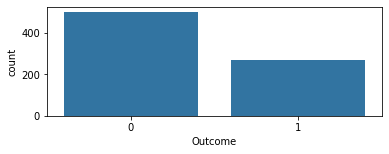

In [17]:
# Check whether data is balanced or not
# means equal no. of records related to diabetic and non diabetic patients
plt.figure(figsize=(6,2))
sns.countplot(x= data.Outcome)

In [18]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Insights**
- clearly data is imbalanced since we have more records related to non diabetic and less records related to diabetic

In [19]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


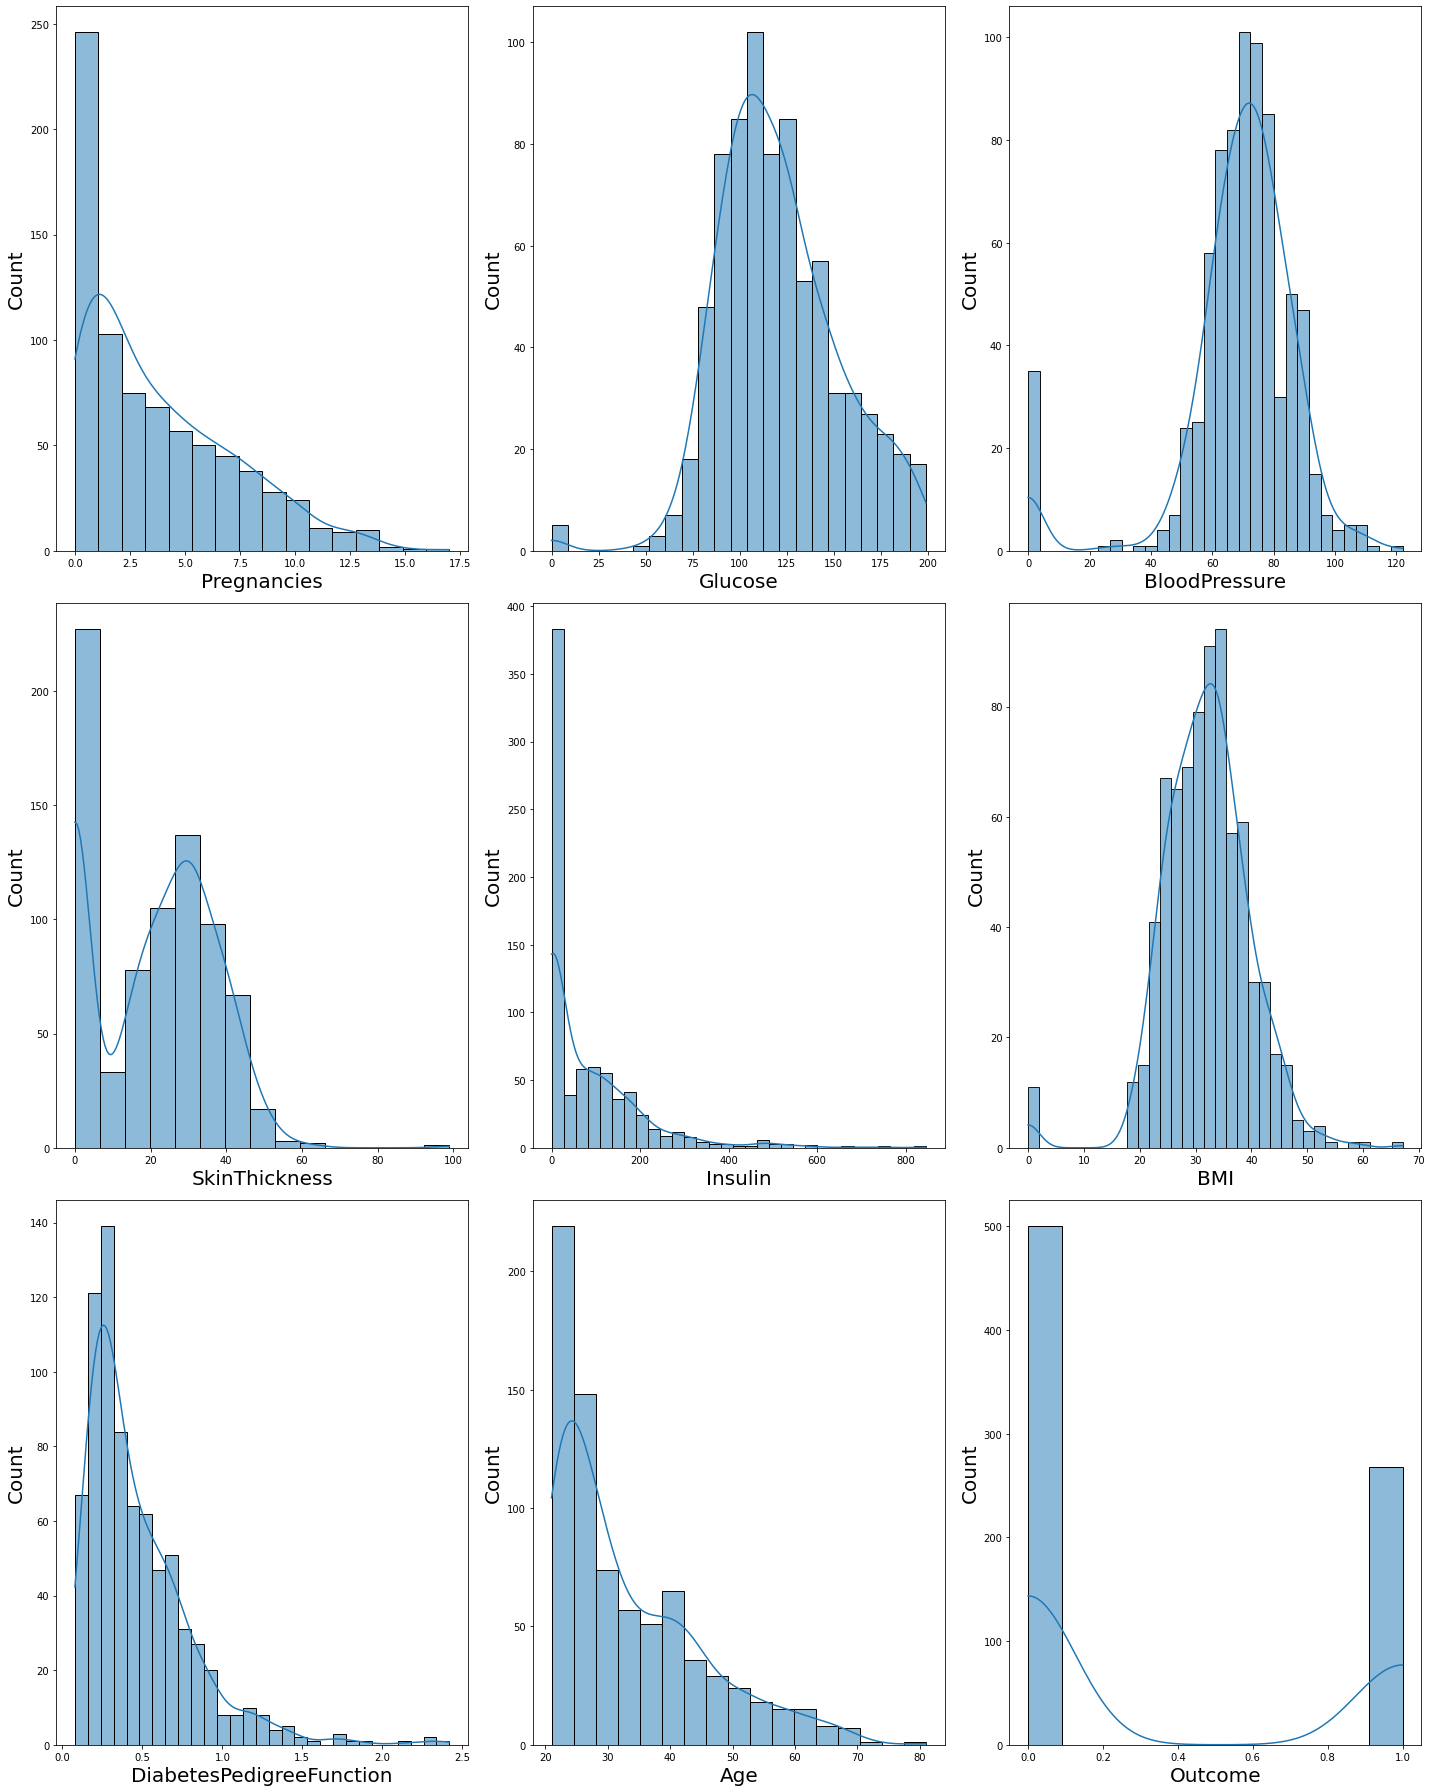

In [20]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

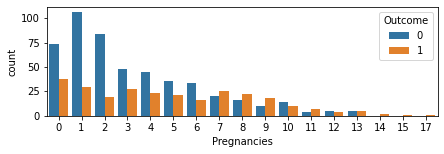

In [21]:
### Bivariate analysis refers to plots between input variables and target variable

## Analyzing how pragnancies impact the patient with diabetes
plt.figure(figsize=(7,2))
sns.countplot(x='Pregnancies',data=data,hue='Outcome')
plt.show()


<Axes: xlabel='Glucose', ylabel='Count'>

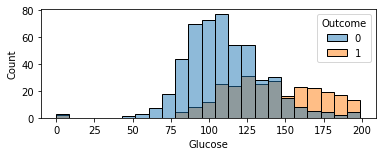

In [22]:
### Analyzing the relationship between diabetes and glucose
plt.figure(figsize=(6,2))
sns.histplot(x='Glucose',hue='Outcome',data=data)

In [23]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='BloodPressure', ylabel='Count'>

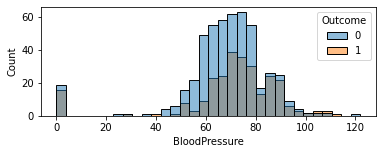

In [24]:
## Analyze relationship between BloodPressure and Outcome
plt.figure(figsize=(6,2))
sns.histplot(x='BloodPressure',hue='Outcome',data= data)

<Axes: xlabel='Insulin', ylabel='Count'>

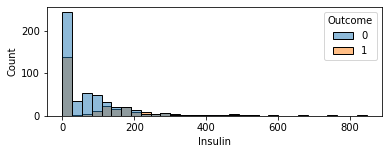

In [25]:
## Analyzing Insulin with target
plt.figure(figsize=(6,2))
sns.histplot(x='Insulin',hue='Outcome',data=data)

<Axes: xlabel='Age', ylabel='Count'>

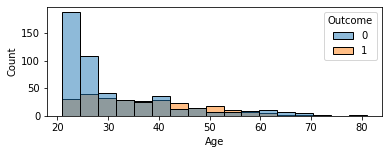

In [26]:
## Analyzing age with target
plt.figure(figsize=(6,2))
sns.histplot(x='Age',hue='Outcome',data= data)

<Axes: xlabel='BMI', ylabel='Count'>

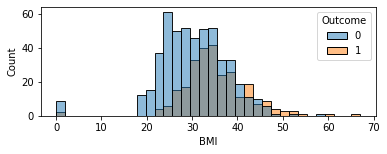

In [27]:
## Analyzing BMI with target
plt.figure(figsize=(6,2))
sns.histplot(x='BMI',hue='Outcome',data=data)

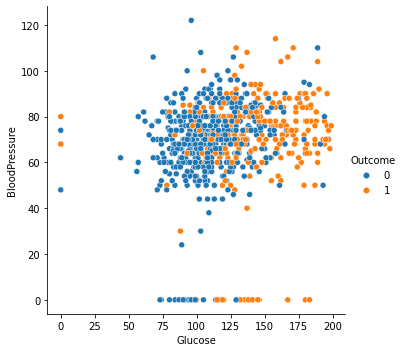

In [28]:
## Analyze Glucose with blood pressure

sns.relplot(x='Glucose',y='BloodPressure',hue='Outcome',data=data)
plt.show()

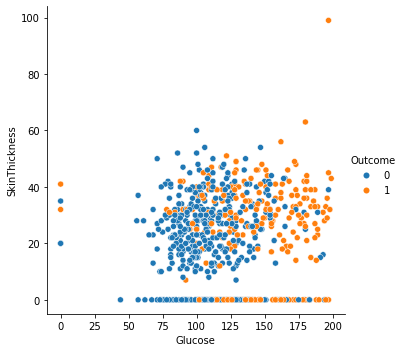

In [29]:
## Analyze glucose with SkinThickness

sns.relplot(x='Glucose',y='SkinThickness',hue='Outcome',data=data)
plt.show()

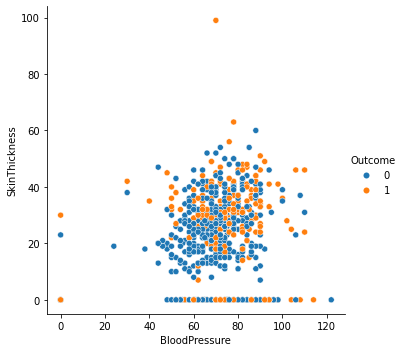

In [30]:
## Analyze BP with SkinThickness

sns.relplot(x='BloodPressure',y='SkinThickness',hue='Outcome',data=data)
plt.show()

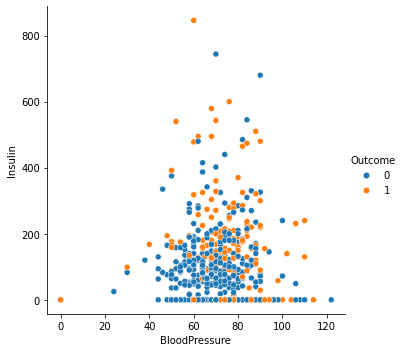

In [31]:
## Analyze BP with Insulin

sns.relplot(x='BloodPressure',y='Insulin',hue='Outcome',data=data)
plt.show()

### Multivariate

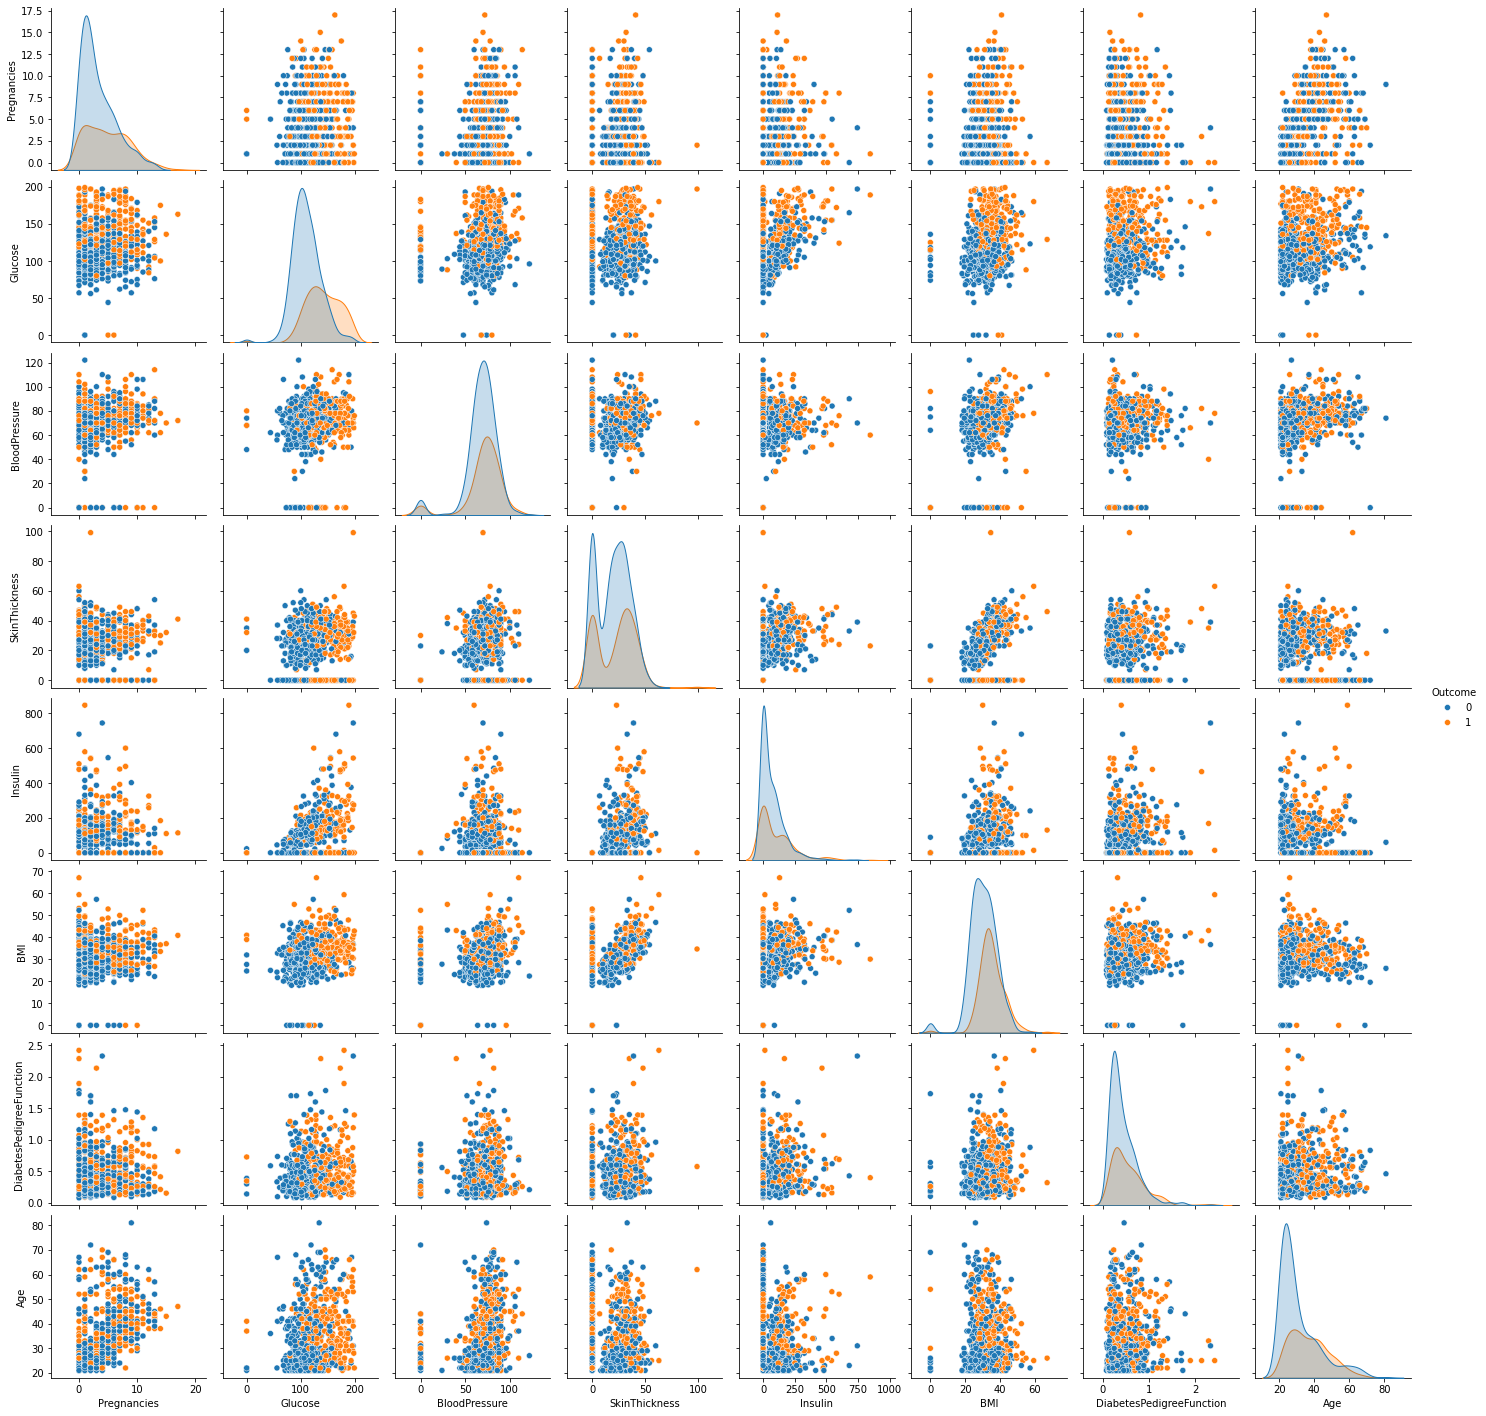

In [32]:
sns.pairplot(data,hue='Outcome')

### Data Preprocessing

In [33]:
#Step 1 Handling the missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
# check for duplicates
data.duplicated().sum()

np.int64(0)

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [36]:
data.loc[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [37]:
## Step 2 Handling the corrupted data
## In 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI' certain datapoints are zero.
data['Glucose'] = data['Glucose'].replace(0, np.median(data['Glucose']))


In [38]:
np.median(data.Glucose)

np.float64(117.0)

In [39]:
data.loc[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [40]:
data.loc[data['Glucose']==117.0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
29,5,117,92,0,0,34.1,0.337,38,0
75,1,117,48,20,0,24.7,0.140,22,0
128,1,117,88,24,145,34.5,0.403,40,1
182,1,117,74,20,23,27.7,0.299,21,0
229,0,117,80,31,53,45.2,0.089,24,0
336,0,117,0,0,0,33.8,0.932,44,0
342,1,117,68,35,0,32.0,0.389,22,0
349,5,117,80,32,0,41.0,0.346,37,1
442,4,117,64,27,120,33.2,0.230,24,0
444,4,117,62,12,0,29.7,0.380,30,1


In [41]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)
data.BMI.replace(0,np.median(data.BMI),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_20592\3549150814.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_20592\3549150814.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [42]:
np.median(data.SkinThickness)

np.float64(23.0)

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [44]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [45]:
## Step 3:- Numerical representation of string data

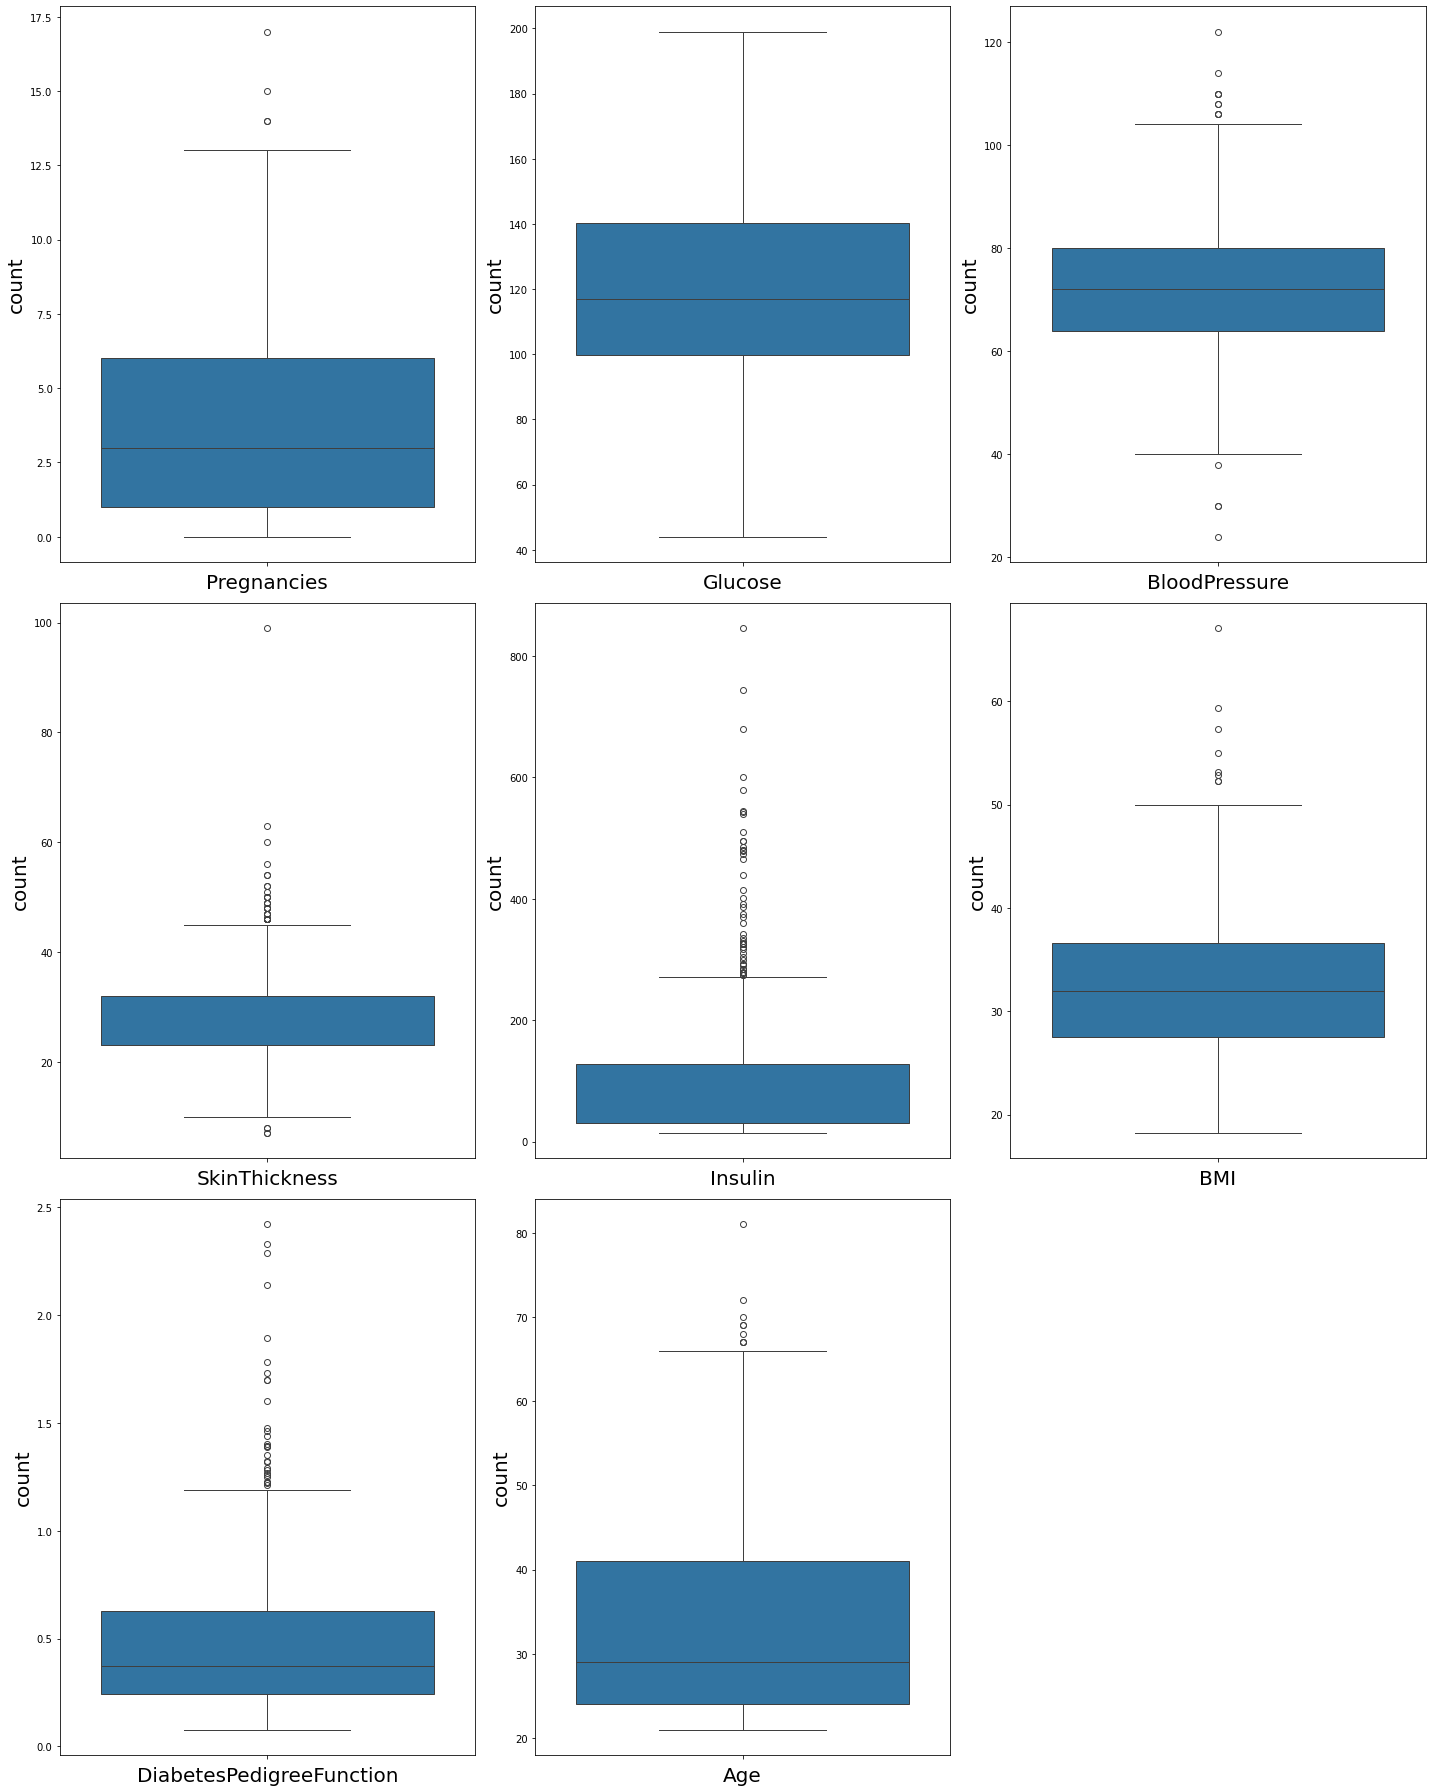

In [46]:
## Step 4:- Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data.drop('Outcome',axis=1):
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [47]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [48]:
# Step 5 : Scaling the data

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
dl=['Pregnancies','Outcome']
data1=sc.fit_transform(data.drop(dl,axis=1))

In [49]:
data1

array([[0.67096774, 0.48979592, 0.30434783, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.26451613, 0.42857143, 0.23913043, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.89677419, 0.40816327, 0.17391304, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.49677419, 0.48979592, 0.17391304, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.52903226, 0.36734694, 0.17391304, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.31612903, 0.46938776, 0.26086957, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [50]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1


In [51]:
type(data1)

numpy.ndarray

In [52]:
data2=pd.DataFrame(data1,columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                                    'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [53]:
data2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


In [54]:
con_data = data[['Pregnancies', 'Outcome']]

In [55]:
con_data

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [56]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
final_df=pd.concat([data2,con_data],axis=1)
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1


### Feature Selection

<Axes: >

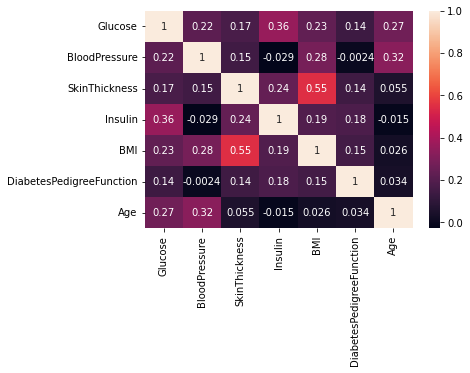

In [58]:
## NO redundent features
## We will check corrrelation
sns.heatmap(data2.corr(),annot=True)

# So no correlation hence no features should be dropped.

### Model Creation

In [59]:
final_df.head(1)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1


In [60]:
## Step 1 : Creating independent and dependent variable
X = final_df.iloc[:,:-1]
y = final_df.Outcome

In [61]:
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0
...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1


In [62]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [63]:
## Step 2: Creating training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=45)


In [64]:
y_test

195    1
51     0
66     1
437    0
665    0
      ..
246    0
556    0
298    1
339    1
146    0
Name: Outcome, Length: 154, dtype: int64

In [65]:
X_test

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies
195,0.735484,0.612245,0.369565,0.235577,0.433538,0.135354,0.133333,5
51,0.367742,0.265306,0.086957,0.026442,0.122699,0.191289,0.083333,1
66,0.419355,0.653061,0.250000,0.019832,0.292434,0.331768,0.283333,0
437,0.664516,0.520408,0.173913,0.019832,0.239264,0.152007,0.116667,5
665,0.438710,0.571429,0.413043,0.141827,0.339468,0.059351,0.050000,1
...,...,...,...,...,...,...,...,...
246,0.503226,0.448980,0.173913,0.019832,0.265849,0.076857,0.333333,10
556,0.341935,0.469388,0.358696,0.019832,0.406953,0.059778,0.150000,1
298,0.361290,0.551020,0.195652,0.204327,0.376278,0.142613,0.416667,14
339,0.864516,0.612245,0.173913,0.019832,0.443763,0.108027,0.333333,7


In [66]:
X_train.shape

(614, 8)

In [67]:
y_train.shape

(614,)

In [68]:
## Step 3: Model Creation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)  ## training

LogisticRegression()

In [69]:
## Step 4 : Predicion
y_pred= clf.predict(X_test)

In [70]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [71]:
y_test

195    1
51     0
66     1
437    0
665    0
      ..
246    0
556    0
298    1
339    1
146    0
Name: Outcome, Length: 154, dtype: int64

In [72]:
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob

array([[0.33714632, 0.66285368],
       [0.90111418, 0.09888582],
       [0.747557  , 0.252443  ],
       [0.54720827, 0.45279173],
       [0.80487519, 0.19512481],
       [0.85909433, 0.14090567],
       [0.52798275, 0.47201725],
       [0.92269891, 0.07730109],
       [0.37439657, 0.62560343],
       [0.91512891, 0.08487109],
       [0.2410086 , 0.7589914 ],
       [0.54847616, 0.45152384],
       [0.94347329, 0.05652671],
       [0.4373202 , 0.5626798 ],
       [0.73756829, 0.26243171],
       [0.90003389, 0.09996611],
       [0.0720747 , 0.9279253 ],
       [0.60587027, 0.39412973],
       [0.3932509 , 0.6067491 ],
       [0.91465044, 0.08534956],
       [0.66165506, 0.33834494],
       [0.71839729, 0.28160271],
       [0.5756663 , 0.4243337 ],
       [0.8199637 , 0.1800363 ],
       [0.79512367, 0.20487633],
       [0.37255069, 0.62744931],
       [0.85562186, 0.14437814],
       [0.3452038 , 0.6547962 ],
       [0.22501826, 0.77498174],
       [0.83256232, 0.16743768],
       [0.

### Evaluation of model

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report

In [74]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[90 14]
 [24 26]]


In [75]:
acc = accuracy_score(y_test, y_pred)
acc

0.7532467532467533

In [76]:
26/50   # Out of actual positive how many correct positive model predicted.

0.52

In [77]:
recall = recall_score(y_test, y_pred)
recall

np.float64(0.52)

In [78]:
26/40    # Out of predicted positive how many correct positive model predicted.

0.65

In [79]:
precision = precision_score(y_test, y_pred)
precision

np.float64(0.65)

In [80]:
f1score=f1_score(y_test,y_pred)
f1score

NameError: name 'f1_score' is not defined

In [ ]:
cr= classification_report(y_test,y_pred)
print(cr)

In [81]:
y_test.value_counts()

Outcome
0    104
1     50
Name: count, dtype: int64